<a href="https://colab.research.google.com/github/crystalclcm/JobPostings/blob/main/SampleExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('/content/travel_exam_dataset.csv')

In [ ]:
df.head()

,booking_id,passenger_age,travel_class,origin_city,destination_city,booking_date,departure_date,ticket_price,partner,payment_status,review_text
0,1,56.0,Economy,Rome,Berlin,2023-09-28,2023-11-22,54.92,FlyNow,Failed,Great flight!
1,2,28.0,Business,Dublin,Paris,10/04/2023,2023-04-28,624.23,AirX,Paid,Terrible delay.
2,3,70.0,Business,Dublin,Paris,2023-10-21,17/10/2023,113.71,FlyNow,Pending,NaN
3,4,39.0,Economy,London,Rome,18/02/2023,12/04/2023,113.48,GoSky,Paid,Terrible delay.
4,5,45.0,Premium,Dublin,Dublin,28/09/2023,2023-11-23,197.01,GoSky,Pending,NaN


In [3]:
df.shape

(150, 11)

In [4]:
df.isna().sum()

,0
booking_id,0
passenger_age,2
travel_class,0
origin_city,0
destination_city,0
booking_date,0
departure_date,0
ticket_price,0
partner,40
payment_status,0


#Q1 – Cleaning (30 marks)

check if age has any 0 values

In [5]:
count=0
for i in df['passenger_age']:
  if i==0:
    count+=1

count

0

In [6]:
df['partner'].value_counts()

,count
partner,
AirX,40
GoSky,39
FlyNow,31


In [7]:
# Impute missing values for 'passenger_age' with the mean
df.fillna({'passenger_age':df['passenger_age'].mean()}, inplace=True)

# Impute missing values for 'partner' with the mode
df.fillna({'partner':'Unknown'}, inplace=True)


In [8]:
df['partner'].value_counts()

,count
partner,
AirX,40
Unknown,40
GoSky,39
FlyNow,31


In [9]:
dates=df['booking_date']

dates

,booking_date
0,2023-09-28
1,10/04/2023
2,2023-10-21
3,18/02/2023
4,28/09/2023
...,...
145,14/09/2023
146,2023-02-24
147,2023-05-17
148,16/03/2023


In [10]:
df['booking_date']= df['booking_date'].str.replace(r'(\d{2})/(\d{2})/(\d{4})',r'\3-\2-\1', regex=True)

df['departure_date']= df['departure_date'].str.replace(r'(\d{2})/(\d{2})/(\d{4})',r'\3-\2-\1', regex=True)


use regex - for changing the format of the dates

In [11]:
df.head()

,booking_id,passenger_age,travel_class,origin_city,destination_city,booking_date,departure_date,ticket_price,partner,payment_status,review_text
0,1,56.0,Economy,Rome,Berlin,2023-09-28,2023-11-22,54.92,FlyNow,Failed,Great flight!
1,2,28.0,Business,Dublin,Paris,2023-04-10,2023-04-28,624.23,AirX,Paid,Terrible delay.
2,3,70.0,Business,Dublin,Paris,2023-10-21,2023-10-17,113.71,FlyNow,Pending,NaN
3,4,39.0,Economy,London,Rome,2023-02-18,2023-04-12,113.48,GoSky,Paid,Terrible delay.
4,5,45.0,Premium,Dublin,Dublin,2023-09-28,2023-11-23,197.01,GoSky,Pending,NaN


#Q2 – Transforming (40 marks)

travel_class should be encoded with 0,1,2 (ordered)
while partner should be 0,1 with 3 cols



In [12]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['Economy', 'Business', 'Premium']])
ordinal_encoder.fit(df[['travel_class']])
df['travel_class_encoded'] = ordinal_encoder.transform(df[['travel_class']])

# One-Hot Encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

partner_encoded = onehot_encoder.fit_transform(df[['partner']])
partner_df = pd.DataFrame(partner_encoded, columns=onehot_encoder.get_feature_names_out(['partner']))

df = pd.concat([df, partner_df], axis=1)


In [13]:
df.drop(columns=['travel_class', 'partner'], inplace=True)

In [14]:
df

,booking_id,passenger_age,origin_city,destination_city,booking_date,departure_date,ticket_price,payment_status,review_text,travel_class_encoded,partner_AirX,partner_FlyNow,partner_GoSky,partner_Unknown
0,1,56.0,Rome,Berlin,2023-09-28,2023-11-22,54.92,Failed,Great flight!,0.0,0.0,1.0,0.0,0.0
1,2,28.0,Dublin,Paris,2023-04-10,2023-04-28,624.23,Paid,Terrible delay.,1.0,1.0,0.0,0.0,0.0
2,3,70.0,Dublin,Paris,2023-10-21,2023-10-17,113.71,Pending,NaN,1.0,0.0,1.0,0.0,0.0
3,4,39.0,London,Rome,2023-02-18,2023-04-12,113.48,Paid,Terrible delay.,0.0,0.0,0.0,1.0,0.0
4,5,45.0,Dublin,Dublin,2023-09-28,2023-11-23,197.01,Pending,NaN,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,58.0,Berlin,London,2023-09-14,2023-10-24,98.08,Paid,Great flight!,2.0,1.0,0.0,0.0,0.0
146,147,40.0,Rome,Berlin,2023-02-24,2023-03-30,110.54,Failed,Great flight!,1.0,0.0,0.0,1.0,0.0
147,148,64.0,Madrid,Rome,2023-05-17,2023-07-02,235.87,Pending,Great flight!,1.0,0.0,0.0,1.0,0.0
148,149,69.0,London,Rome,2023-03-16,2023-04-17,401.49,Pending,NaN,0.0,1.0,0.0,0.0,0.0


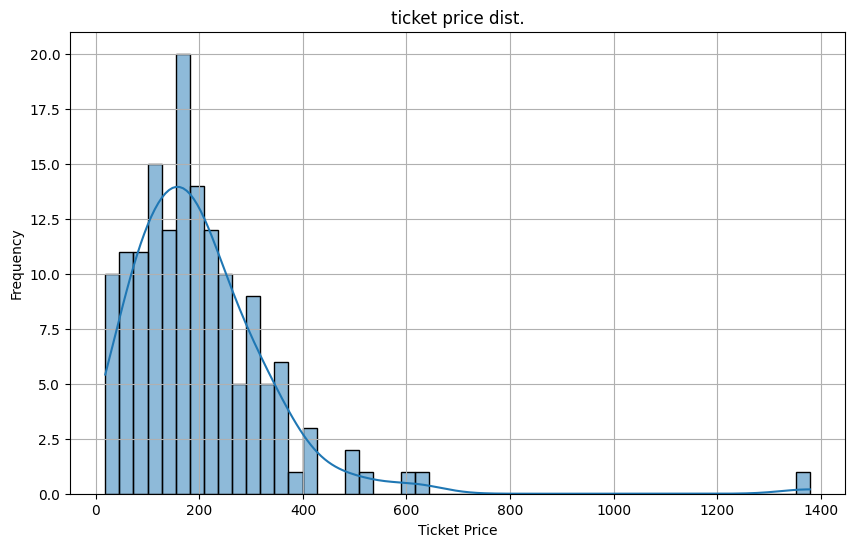

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ticket_price'], kde=True, bins=50)
plt.title('ticket price dist.')
plt.xlabel('Ticket Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

standard scaling is used for normally distributed data
normalisation is used if the data is skewed

In [16]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler= MinMaxScaler()
mm_scaler.fit(df[['ticket_price']])
df['ticket_price_normalised']= mm_scaler.transform(df[['ticket_price']])
df.head()


,booking_id,passenger_age,origin_city,destination_city,booking_date,departure_date,ticket_price,payment_status,review_text,travel_class_encoded,partner_AirX,partner_FlyNow,partner_GoSky,partner_Unknown,ticket_price_normalised
0,1,56.0,Rome,Berlin,2023-09-28,2023-11-22,54.92,Failed,Great flight!,0.0,0.0,1.0,0.0,0.0,0.027086
1,2,28.0,Dublin,Paris,2023-04-10,2023-04-28,624.23,Paid,Terrible delay.,1.0,1.0,0.0,0.0,0.0,0.445328
2,3,70.0,Dublin,Paris,2023-10-21,2023-10-17,113.71,Pending,NaN,1.0,0.0,1.0,0.0,0.0,0.070276
3,4,39.0,London,Rome,2023-02-18,2023-04-12,113.48,Paid,Terrible delay.,0.0,0.0,0.0,1.0,0.0,0.070107
4,5,45.0,Dublin,Dublin,2023-09-28,2023-11-23,197.01,Pending,NaN,2.0,0.0,0.0,1.0,0.0,0.131472


In [17]:
df['ticket_price_quartile']= pd.qcut(df['ticket_price'], q=3, labels=['low', 'medium', 'high'])

In [18]:
df.head()

,booking_id,passenger_age,origin_city,destination_city,booking_date,departure_date,ticket_price,payment_status,review_text,travel_class_encoded,partner_AirX,partner_FlyNow,partner_GoSky,partner_Unknown,ticket_price_normalised,ticket_price_quartile
0,1,56.0,Rome,Berlin,2023-09-28,2023-11-22,54.92,Failed,Great flight!,0.0,0.0,1.0,0.0,0.0,0.027086,low
1,2,28.0,Dublin,Paris,2023-04-10,2023-04-28,624.23,Paid,Terrible delay.,1.0,1.0,0.0,0.0,0.0,0.445328,high
2,3,70.0,Dublin,Paris,2023-10-21,2023-10-17,113.71,Pending,NaN,1.0,0.0,1.0,0.0,0.0,0.070276,low
3,4,39.0,London,Rome,2023-02-18,2023-04-12,113.48,Paid,Terrible delay.,0.0,0.0,0.0,1.0,0.0,0.070107,low
4,5,45.0,Dublin,Dublin,2023-09-28,2023-11-23,197.01,Pending,NaN,2.0,0.0,0.0,1.0,0.0,0.131472,medium


/tmp/ipython-input-678574703.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ticket_price_quartile', y='ticket_price', data=df, palette='viridis')


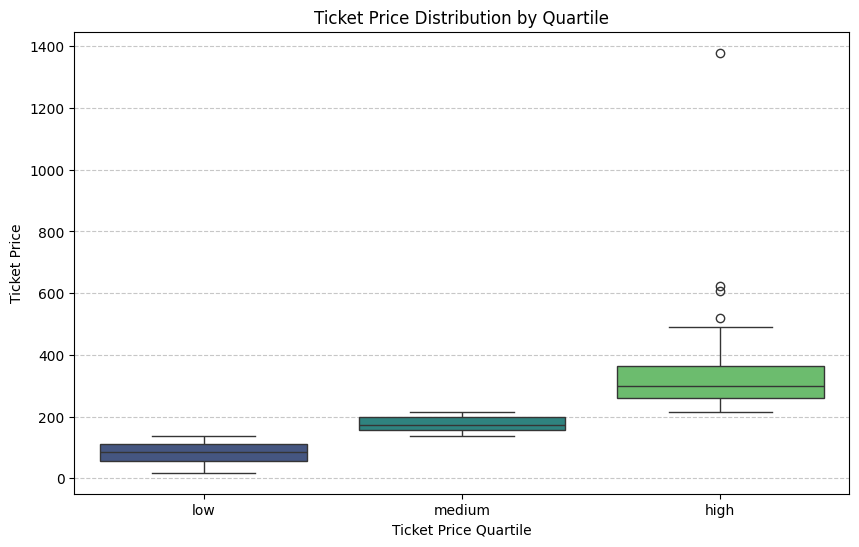

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='ticket_price_quartile', y='ticket_price', data=df, palette='viridis')
plt.title('Ticket Price Distribution by Quartile')
plt.xlabel('Ticket Price Quartile')
plt.ylabel('Ticket Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Q3 – Feature engineering (30 marks)

In [20]:
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['departure_date'] = pd.to_datetime(df['departure_date'])

In [21]:
df['days_between_booking_and_departure'] = (df['departure_date'] - df['booking_date']).dt.days


In [22]:
df['departure_month'] = df['departure_date'].dt.month


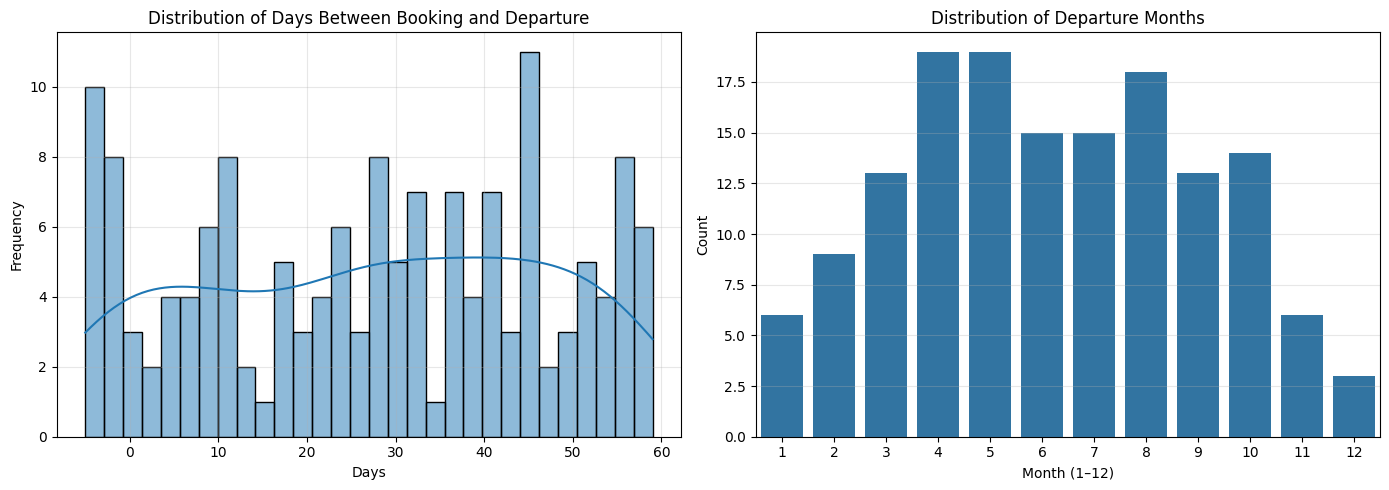

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

# --- Days Between Booking & Departure ---
plt.subplot(1, 2, 1)
sns.histplot(df['days_between_booking_and_departure'], kde=True, bins=30)
plt.title("Distribution of Days Between Booking and Departure")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)

# --- Departure Month ---
plt.subplot(1, 2, 2)
sns.countplot(x=df['departure_month'])
plt.title("Distribution of Departure Months")
plt.xlabel("Month (1–12)")
plt.ylabel("Count")
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
